In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.preprocessing import scale

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
cubic = pd.read_csv('cubic_zirconia.csv')

In [3]:
cubic.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
cubic = cubic.drop('Unnamed: 0',axis=1)

In [5]:
cubic.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
cubic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
print('The shape of the data:',cubic.shape)

The shape of the data: (26967, 10)


In [8]:
cubic.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [9]:
cubic.describe(include='all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [10]:
cubic.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [11]:
print('The Null values in the data ',cubic.isnull().sum().sum(),'for the column ',cubic.columns[4])

The Null values in the data  697 for the column  depth


In [12]:
cubic_ori = cubic.copy()

In [13]:
print('Shape of data before checking the duplicates:',cubic.shape)
dup = cubic.duplicated()
print('Total Duplicates in the data:',sum(dup))
cubic.drop_duplicates(inplace=True)
print('Shape of data after discarding the duplicates:',cubic.shape)

Shape of data before checking the duplicates: (26967, 10)
Total Duplicates in the data: 34
Shape of data after discarding the duplicates: (26933, 10)


In [14]:
dup = cubic.duplicated()
sum(dup)

0

In [15]:
cubic[dup]

,carat,cut,color,clarity,depth,table,x,y,z,price


### Checking the Categorial data

In [16]:
for column in cubic.columns:
    if cubic[column].dtype == 'object':
        print(column.upper(),': ',cubic[column].nunique())
        print(cubic[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




In [40]:
pd.pivot_table(cubic,values='depth',columns='cut',index=['clarity'])

cut,Fair,Good,Ideal,Premium,Very Good
clarity,,,,,
I1,65.663529,62.473469,61.734722,61.223585,61.764286
IF,60.166667,60.900000,61.640902,60.904464,61.531496
SI1,64.094180,62.666622,61.738998,61.308220,61.964929
SI2,64.302273,62.196869,61.703807,61.225788,61.861155
VS1,62.466667,62.079751,61.697294,61.317508,61.734527
VS2,63.600820,62.435685,61.725620,61.255861,61.860755
VVS1,60.800000,62.243434,61.679582,61.257947,61.630053
VVS2,62.983784,62.302837,61.672699,61.281728,61.628059


In [90]:
cubic[cubic.isnull().any(axis=1)][['cut','depth','clarity']]

,cut,depth,clarity
26,Ideal,NaN,SI1
86,Ideal,NaN,SI2
117,Premium,NaN,SI1
148,Premium,NaN,SI2
163,Very Good,NaN,VS2
...,...,...,...
26848,Very Good,NaN,VS1
26854,Premium,NaN,VS2
26879,Very Good,NaN,SI1
26923,Ideal,NaN,VS2


In [53]:
cubic.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [17]:
cubic.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [18]:
cubic.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [19]:
cubic1= cubic.drop(['cut','clarity','color'],axis=1)
cubic1.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [20]:
cubic2 = cubic1.drop('price',axis=1)
cubic2.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [21]:
#in y and z cols having values as 0 -- check
# convert obj to cat

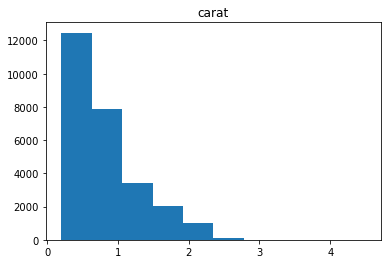

D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


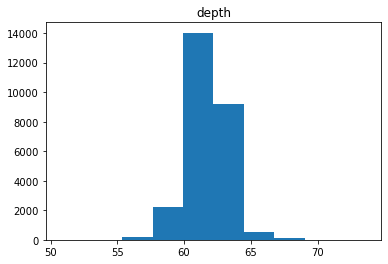

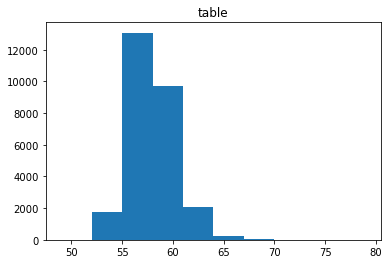

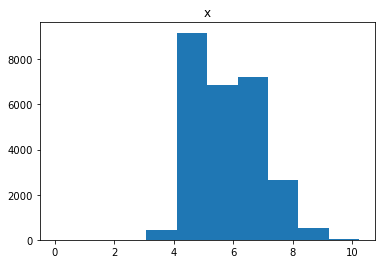

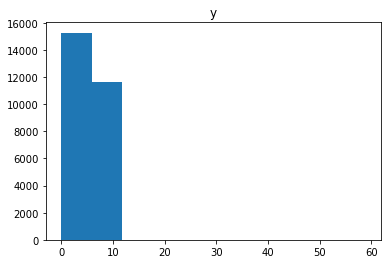

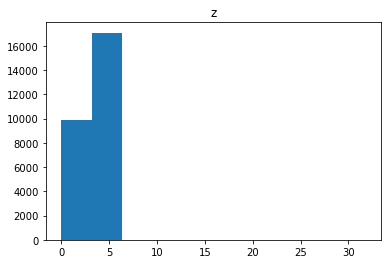

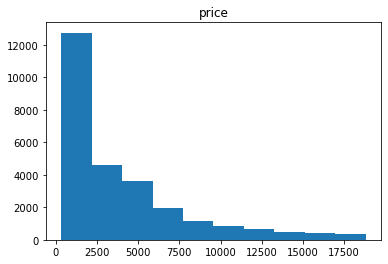

In [22]:
for i in cubic1.columns:
    plt.figure()
    plt.hist(cubic1[i].astype('float'))
    plt.title(i)
    plt.show()

<AxesSubplot:xlabel='cut', ylabel='price'>

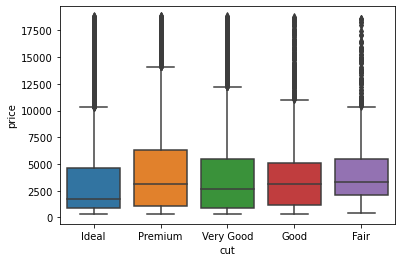

In [23]:
sns.boxplot(x=cubic['cut'],y=cubic['price'])

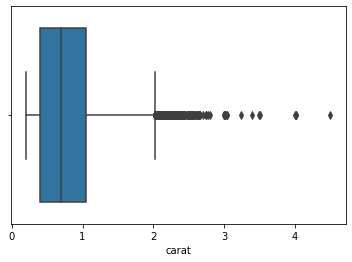

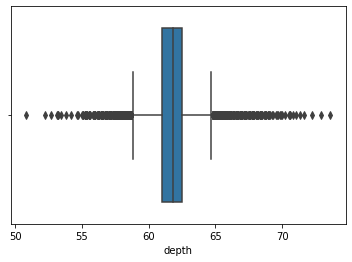

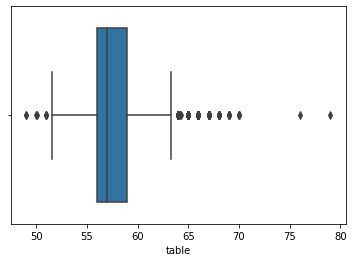

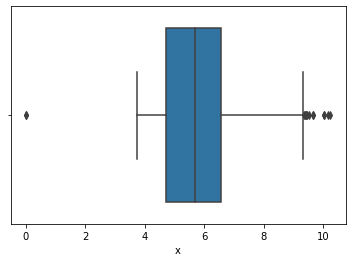

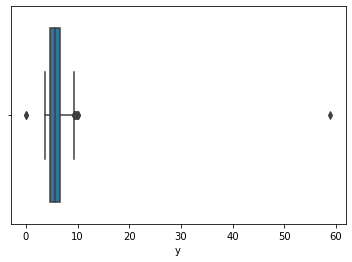

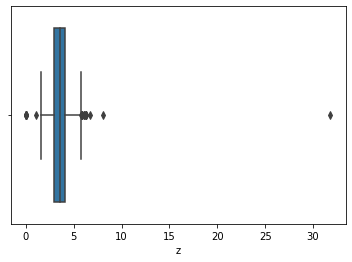

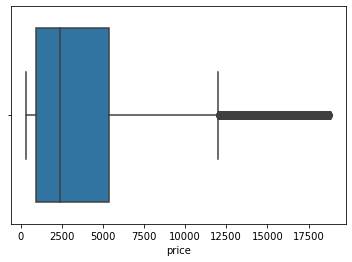

In [24]:
for col in cubic1:
    plt.figure()
    sns.boxplot(cubic1[col])

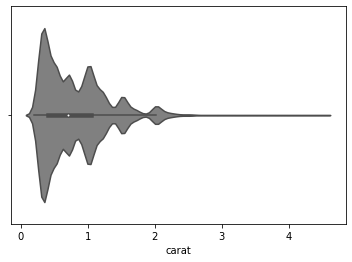

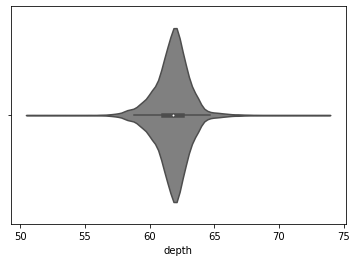

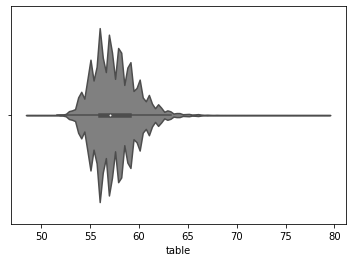

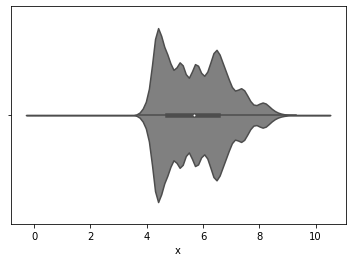

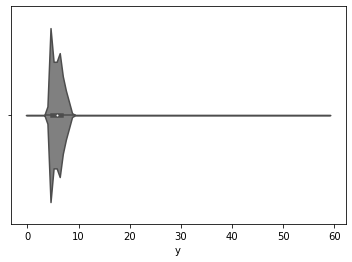

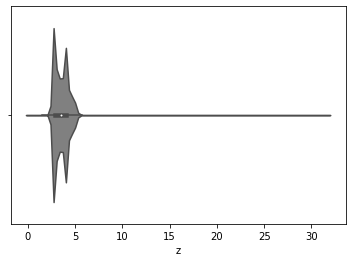

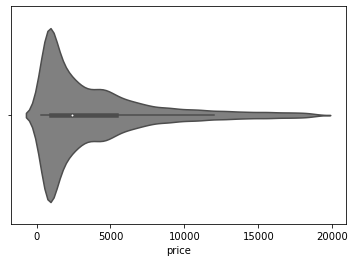

In [25]:
for col in cubic1:
    plt.figure()
    sns.violinplot(cubic1[col],color='grey')

<Figure size 432x288 with 0 Axes>

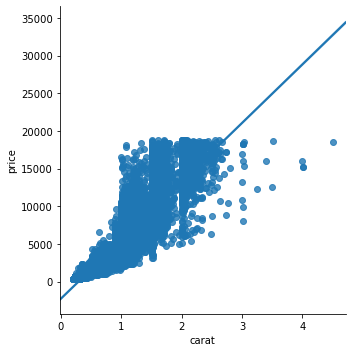

<Figure size 432x288 with 0 Axes>

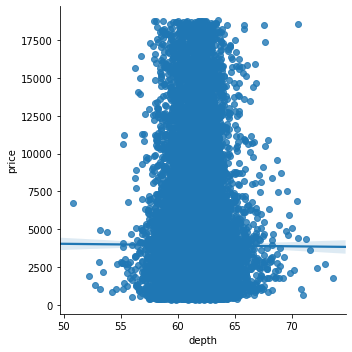

<Figure size 432x288 with 0 Axes>

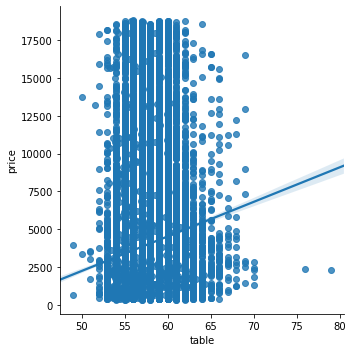

<Figure size 432x288 with 0 Axes>

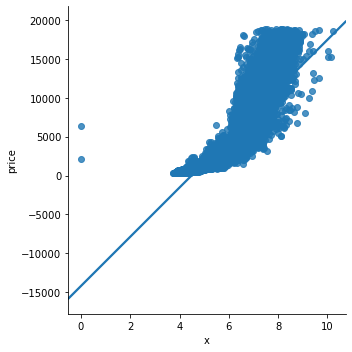

<Figure size 432x288 with 0 Axes>

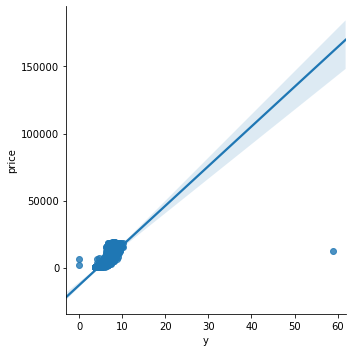

<Figure size 432x288 with 0 Axes>

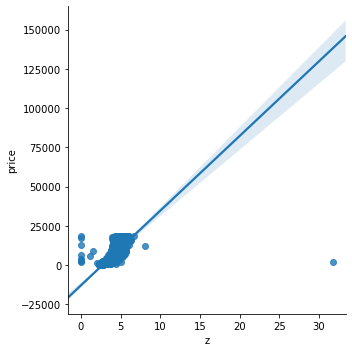

In [26]:
for col in cubic2.columns:
    plt.figure()
    sns.lmplot(x=col,y='price',data=cubic)

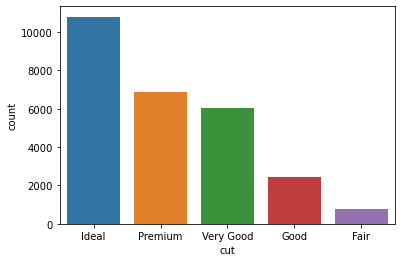

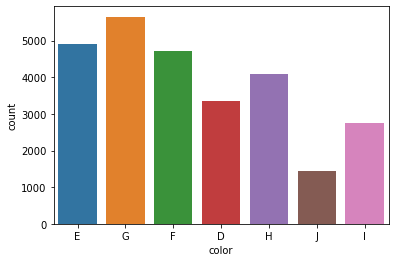

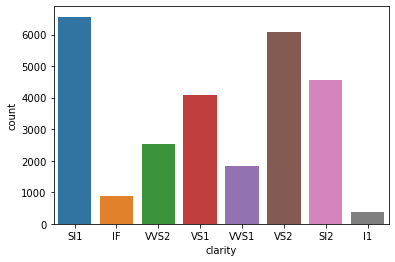

In [27]:
for col in cubic:
    if cubic[col].dtypes == 'object':
        plt.figure()
        sns.countplot(cubic[col])
        plt.show()

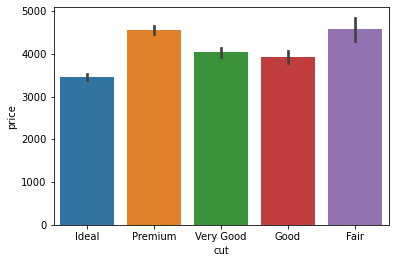

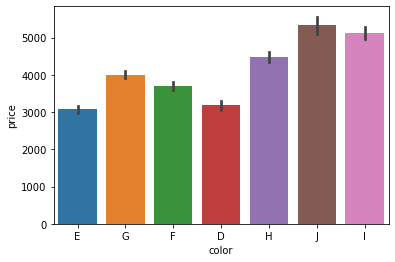

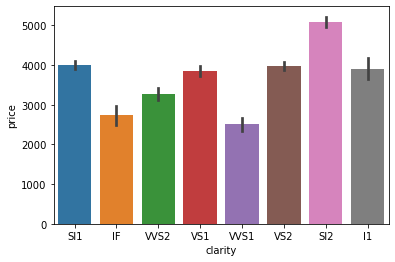

In [28]:
for col in cubic:
    if cubic[col].dtypes == 'object':
        plt.figure()
        sns.barplot(x=cubic[col],y=cubic['price'],data=cubic)
        plt.show()

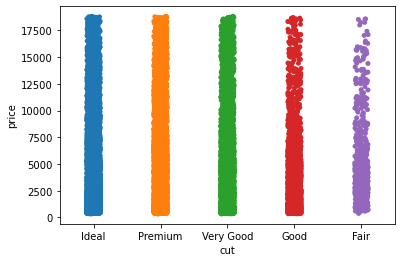

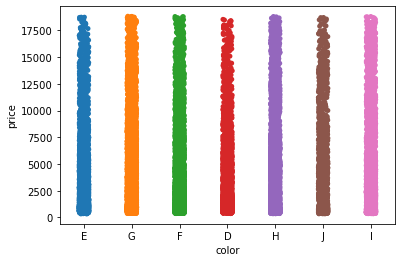

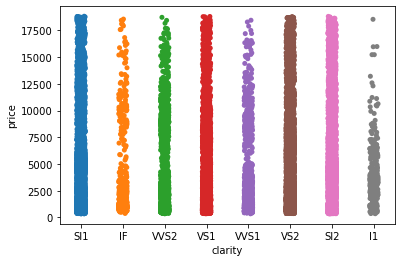

In [29]:
for col in cubic:
    if cubic[col].dtypes == 'object':
        plt.figure()
        sns.stripplot(x=cubic[col],y=cubic['price'],data=cubic)
        plt.show()

D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


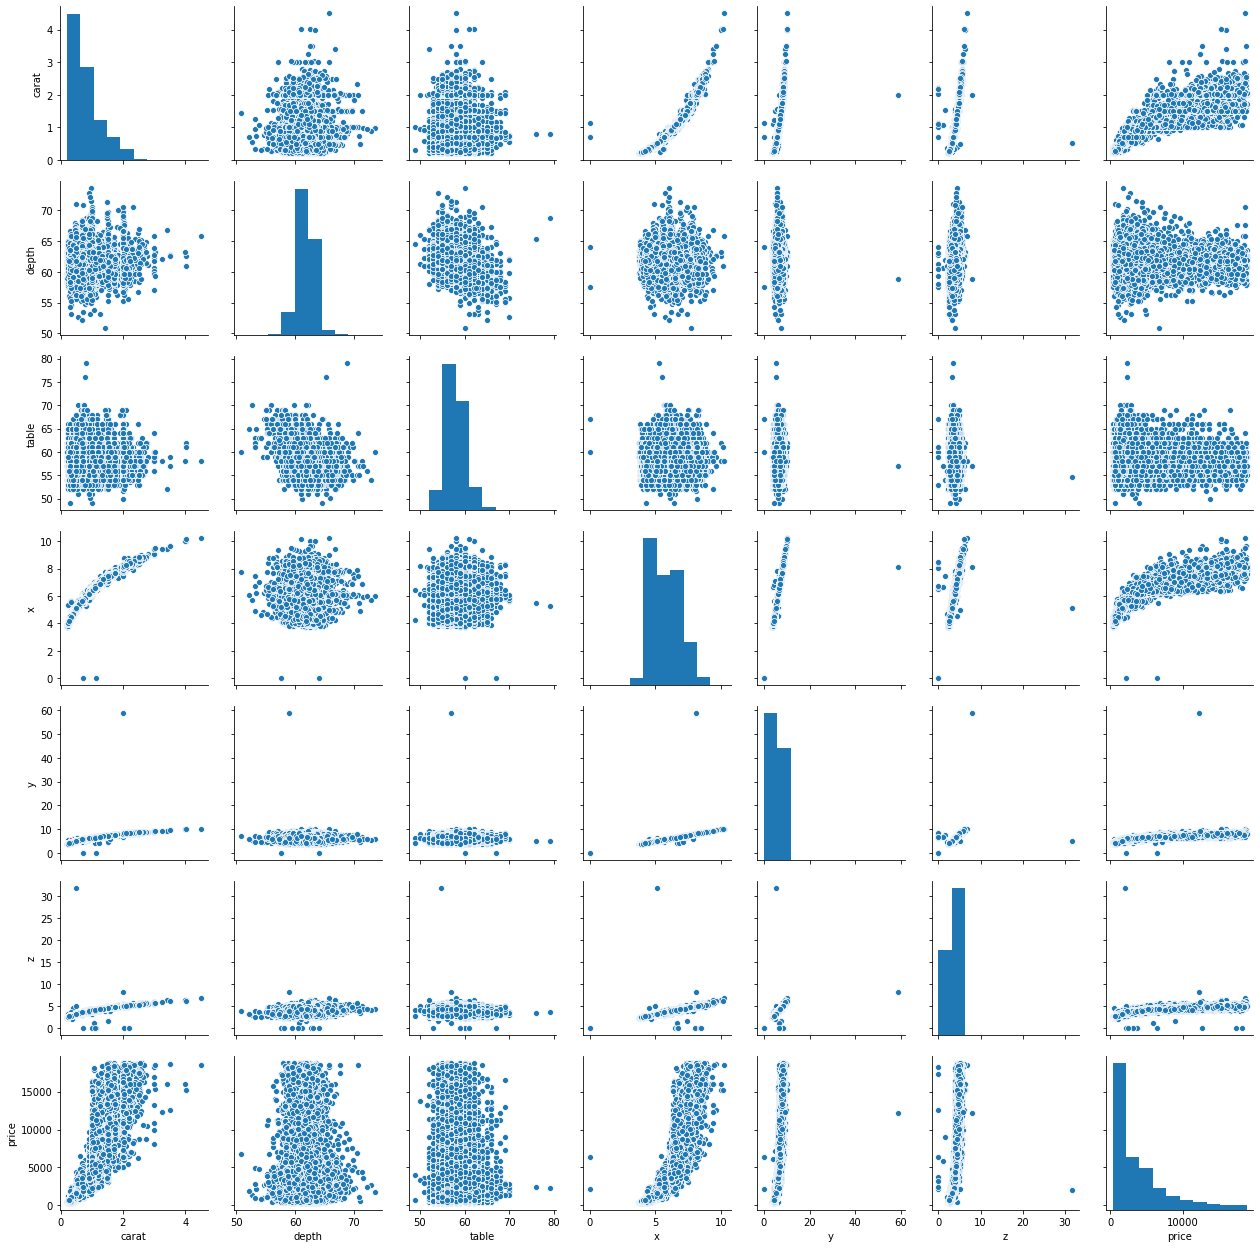

In [30]:
sns.pairplot(cubic)

In [31]:
corr = cubic.corr()
corr

,carat,depth,table,x,y,z,price
carat,1.000000,0.035240,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.035240,1.000000,-0.297768,-0.018401,-0.024453,0.101973,-0.002895
table,0.181539,-0.297768,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018401,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024453,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.101973,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002895,0.126844,0.886554,0.856441,0.850682,1.000000


<AxesSubplot:>

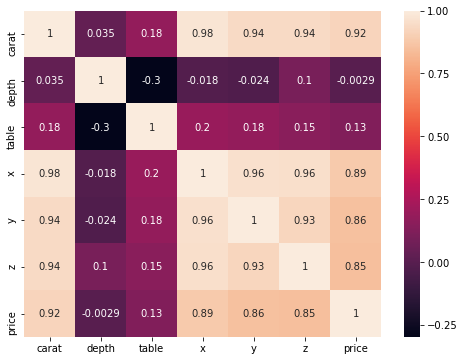

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(cubic.corr(),annot=True)

#### The variable depth is not much correlated with the target variable it might be due to presence of large null values present.

In [33]:
cubic.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [34]:
cubic.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [35]:
print('For the numeric columns which has value 0 to be checked:\n')
for i in cubic1.columns:
    x=cubic[cubic[i]==0]
    print('\nIn the column ',i,':\n')
    print(x)

For the numeric columns which has value 0 to be checked:


In the column  carat :

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

In the column  depth :

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

In the column  table :

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

In the column  x :

       carat   cut color clarity  depth  table    x    y    z  price
5821    0.71  Good     F     SI2   64.1   60.0  0.0  0.0  0.0   2130
17506   1.14  Fair     G     VS1   57.5   67.0  0.0  0.0  0.0   6381

In the column  y :

       carat   cut color clarity  depth  table    x    y    z  price
5821    0.71  Good     F     SI2   64.1   60.0  0.0  0.0  0.0   2130
17506   1.14  Fair     G     VS1   57.5   67.0  0.0  0.0  0.0   6381

In the column  z :

       carat      cut color clarity  depth  table     x     y    z  price
5821    0.71     Good     F     SI

In [36]:
for cols in cubic[['x','y','z']]:
    cubic[cols].replace(0.0,np.nan,inplace=True)

In [37]:
for cols in cubic[['depth','x','y','z']]:
    cubic[cols].fillna(cubic[cols].median(),inplace=True)

In [38]:
cubic.iloc[5820]

carat      0.71
cut        Good
color         F
clarity     SI2
depth      64.1
table        60
x          5.69
y           5.7
z          3.52
price      2130
Name: 5821, dtype: object

#print(cubic.mean(),cubic.median())

In [39]:
cubic.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [40]:
for i in cubic[['x','y','z']]:
    print('In the column ',i,':')
    print(cubic[cubic[i]==0])

In the column  x :
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []
In the column  y :
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []
In the column  z :
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []


In [41]:
for i in cubic[['cut','color','clarity']]:
    print(cubic[i].value_counts())

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64


In [42]:
cubic['cut']=np.where(cubic['cut'] =='Ideal', '4', cubic['cut'])
cubic['cut']=np.where(cubic['cut'] =='Premium', '3', cubic['cut'])
cubic['cut']=np.where(cubic['cut'] =='Very Good', '2', cubic['cut'])
cubic['cut']=np.where(cubic['cut'] =='Good', '1', cubic['cut'])
cubic['cut']=np.where(cubic['cut'] =='Fair', '0', cubic['cut'])

In [43]:
cubic['color']=np.where(cubic['color'] =='D', '6', cubic['color'])
cubic['color']=np.where(cubic['color'] =='E', '5', cubic['color'])
cubic['color']=np.where(cubic['color'] =='F', '4', cubic['color'])
cubic['color']=np.where(cubic['color'] =='G', '3', cubic['color'])
cubic['color']=np.where(cubic['color'] =='H', '2', cubic['color'])
cubic['color']=np.where(cubic['color'] =='I', '1', cubic['color'])
cubic['color']=np.where(cubic['color'] =='J', '0', cubic['color'])

In [44]:
cubic['clarity']=np.where(cubic['clarity'] =='IF', '7', cubic['clarity'])
cubic['clarity']=np.where(cubic['clarity'] =='VVS1', '6', cubic['clarity'])
cubic['clarity']=np.where(cubic['clarity'] =='VVS2', '5', cubic['clarity'])
cubic['clarity']=np.where(cubic['clarity'] =='VS1', '4', cubic['clarity'])
cubic['clarity']=np.where(cubic['clarity'] =='VS2', '3', cubic['clarity'])
cubic['clarity']=np.where(cubic['clarity'] =='SI1', '2', cubic['clarity'])
cubic['clarity']=np.where(cubic['clarity'] =='SI2', '1', cubic['clarity'])
cubic['clarity']=np.where(cubic['clarity'] =='I1', '0', cubic['clarity'])

In [45]:
cubic['cut'] = cubic['cut'].astype('int64')
cubic['color'] = cubic['color'].astype('int64')
cubic['clarity'] = cubic['clarity'].astype('int64')

In [46]:
for column in cubic[['cut','color','clarity']]:
    print(column.upper(),': ',cubic[column].nunique())
    print(cubic[column].value_counts())
    print('\n')

CUT :  5
4    10805
3     6886
2     6027
1     2435
0      780
Name: cut, dtype: int64


COLOR :  7
3    5653
5    4916
4    4723
2    4095
6    3341
1    2765
0    1440
Name: color, dtype: int64


CLARITY :  8
2    6565
3    6093
1    4564
4    4087
5    2530
6    1839
7     891
0     364
Name: clarity, dtype: int64




In [47]:
cubic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int64  
 2   color    26933 non-null  int64  
 3   clarity  26933 non-null  int64  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 3.5 MB


In [48]:
cubic.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,2.909702,3.394794,3.053577,61.746701,57.455950,5.729769,5.733525,3.538815,3937.526120
std,0.477237,1.113165,1.705883,1.646749,1.393875,2.232156,1.126285,1.163989,0.717377,4022.551862
min,0.200000,0.000000,0.000000,0.000000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,2.000000,2.000000,2.000000,61.100000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,4.000000,5.000000,4.000000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,4.000000,6.000000,7.000000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


<AxesSubplot:>

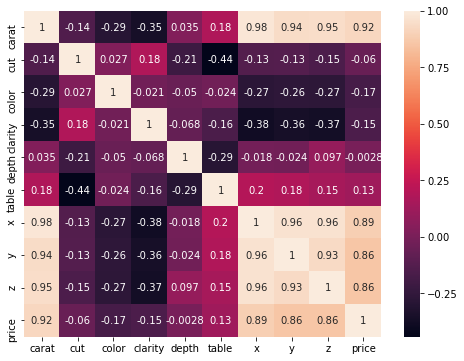

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(cubic.corr(),annot=True)

In [50]:
Q1 = cubic.quantile(0.25)
Q3 = cubic.quantile(0.75)
IQR = Q3-Q1

In [51]:
cubic_out = cubic[~((cubic < (Q1 - 1.5 * IQR)) |(cubic > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
print("Shape of the data without outlier treatment :",cubic_out.shape)
print("Shape of the original data  :",cubic.shape)

Shape of the data without outlier treatment : (23618, 10)
Shape of the original data  : (26933, 10)


<AxesSubplot:>

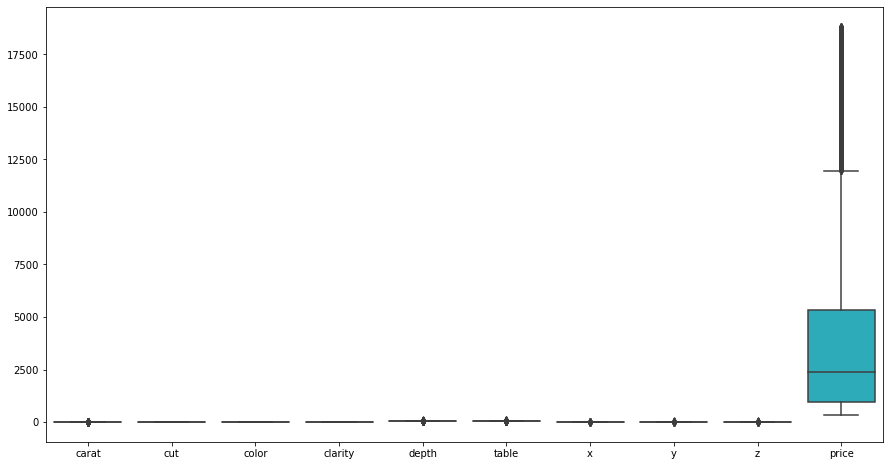

In [52]:
plt.figure(figsize=(15,8))
sns.boxplot(data=cubic)

In [53]:
Q1p =cubic['price'].quantile(0.25)
Q3p =cubic['price'].quantile(0.75)
IQRp=Q3p-Q1p

In [54]:
cubic.groupby(((cubic['price'] < (Q1p - 1.5 * IQRp)) |(cubic['price'] > (Q3p + 1.5 * IQRp)))).size()

price
False    25155
True      1778
dtype: int64

In [55]:
cubic[((cubic['price'] < (Q1p - 1.5 * IQRp)) |(cubic['price'] > (Q3p + 1.5 * IQRp)))]

,carat,cut,color,clarity,depth,table,x,y,z,price
44,2.00,1,1,2,63.9,57.0,8.01,7.91,5.09,12554
62,1.80,2,5,2,62.2,57.0,7.81,7.89,4.88,17273
102,1.69,4,4,3,62.2,57.0,7.59,7.66,4.74,16789
122,1.68,3,4,2,60.7,62.0,7.72,7.66,4.67,12681
124,2.80,3,1,1,61.1,59.0,9.03,8.98,5.50,15030
...,...,...,...,...,...,...,...,...,...,...
26907,1.63,2,3,4,62.5,60.0,7.43,7.51,4.67,14404
26915,2.00,3,0,3,60.8,62.0,8.12,8.09,4.93,13162
26924,2.03,1,2,1,59.6,61.0,8.16,8.21,4.88,14720
26934,1.75,4,1,2,61.8,56.0,7.67,7.71,4.75,13393


In [56]:
cubic[((cubic < (Q1 - 1.5 * IQR)) |(cubic > (Q3 + 1.5 * IQR))).any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
8,1.21,1,2,2,63.8,64.0,6.72,6.63,4.26,5407
14,1.50,0,3,3,66.2,53.0,7.12,7.08,4.70,10644
18,0.90,1,6,2,61.9,64.0,6.00,6.09,3.74,3567
44,2.00,1,1,2,63.9,57.0,8.01,7.91,5.09,12554
50,0.50,3,4,1,58.0,62.0,5.21,5.18,3.01,1031
...,...,...,...,...,...,...,...,...,...,...
26924,2.03,1,2,1,59.6,61.0,8.16,8.21,4.88,14720
26925,0.90,0,4,4,66.2,55.0,6.11,5.97,4.00,4183
26934,1.75,4,1,2,61.8,56.0,7.67,7.71,4.75,13393
26952,0.31,3,5,2,58.3,60.0,4.51,4.48,2.62,698


In [57]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)

    return lower_range, upper_range

In [58]:
for column in cubic.drop(['cut','color','clarity'],axis=1):
    lr,ur=treat_outlier(cubic[column])
    cubic[column]=np.where(cubic[column]>ur,ur,cubic[column])
    cubic[column]=np.where(cubic[column]<lr,lr,cubic[column])

In [59]:
cubic_out = cubic[~((cubic < (Q1 - 1.5 * IQR)) |(cubic > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
print("Shape of the data with outlier treatment :",cubic_out.shape)
print("Shape of the original data  :",cubic.shape)

Shape of the data with outlier treatment : (26933, 10)
Shape of the original data  : (26933, 10)


<AxesSubplot:>

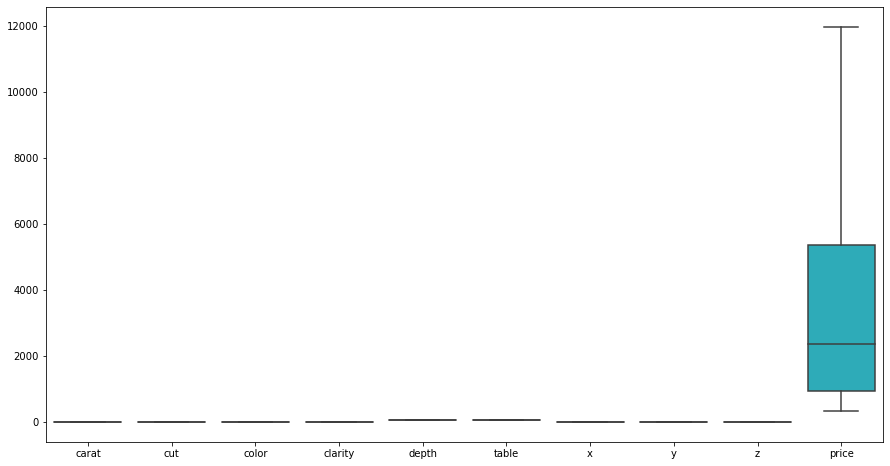

In [60]:
plt.figure(figsize=(15,8))
sns.boxplot(data=cubic)

## Splitting the data into Train and Test data:

In [61]:
X = cubic.drop('price',axis=1)
y = cubic[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [63]:
# invoke the LinearRegression function and find the bestfit model on training data
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [64]:
# Let us explore the coefficients for each of the independent attributes
print('Before Scaling the data:')
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

Before Scaling the data:
The coefficient for carat is 8882.947011046652
The coefficient for cut is 110.29869790685427
The coefficient for color is 278.25383882894823
The coefficient for clarity is 440.2126865169578
The coefficient for depth is 29.25979737057459
The coefficient for table is -12.87221726277376
The coefficient for x is -1244.4540055791676
The coefficient for y is 1415.0093687432372
The coefficient for z is -892.2359295537656


In [65]:
# Let us check the intercept for the model
print('Before Scaling the data:')
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

Before Scaling the data:
The intercept for our model is -4807.704182598456


In [66]:
print('Before Scaling the data, the score of train data :',regression_model.score(X_train, y_train))

Before Scaling the data, the score of train data : 0.9312966038099512


In [67]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

print('Before Scaling the data, the score of test data :',regression_model.score(X_test, y_test))

Before Scaling the data, the score of test data : 0.931355097272696


In [68]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,2,2,3,62.4,60.0,4.41,4.44,2.76,537.0
2275,0.30,4,5,3,61.2,55.0,4.35,4.31,2.65,844.0
19183,0.50,4,3,2,62.5,57.0,5.09,5.05,3.17,1240.0
5030,1.10,1,5,1,63.3,56.0,6.53,6.58,4.15,4065.0
25414,1.02,3,4,1,61.1,62.0,6.54,6.49,3.98,4057.0


In [69]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept   -4807.704183
carat        8882.947011
cut           110.298698
color         278.253839
clarity       440.212687
depth          29.259797
table         -12.872217
x           -1244.454006
y            1415.009369
z            -892.235930
dtype: float64

In [70]:
print('Before Scaling the data:')
print(lm1.summary())  #Inferential statistics

Before Scaling the data:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.838e+04
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:54:27   Log-Likelihood:            -1.5517e+05
No. Observations:               18853   AIC:                         3.104e+05
Df Residuals:                   18843   BIC:                         3.104e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4807.7042    79

In [71]:
import math
train_mse = np.mean((regression_model.predict(X_train)-y_train)**2)
test_mse = np.mean((regression_model.predict(X_test)-y_test)**2)
print('Before Scaling the data:')
print('Mean Square Root of Train set:',math.sqrt(train_mse))
print('Mean Square Root of Test set:',math.sqrt(test_mse))

Before Scaling the data:
Mean Square Root of Train set: 908.3889877565729
Mean Square Root of Test set: 910.1910120918819


In [72]:
y_pred_t1 = regression_model.predict(X_train)
y_pred_t2 = regression_model.predict(X_test)

In [73]:
from sklearn import metrics
mse_t1 = metrics.mean_squared_error(y_train,y_pred_t1)
mse_t2 = metrics.mean_squared_error(y_test,y_pred_t2)
rmse_t1 = np.sqrt(mse_t1)
rmse_t2 = np.sqrt(mse_t2)

In [74]:
print('Before Scaling the data:')
print('Mean Square Error of Train data set:',mse_t1)
print('Mean Square Error of Test data set:',mse_t2)
print('Root Mean Square Error of Train data set:',rmse_t1)
print('Root Mean Square Error of Test data set:',rmse_t2)

Before Scaling the data:
Mean Square Error of Train data set: 825170.5530774147
Mean Square Error of Test data set: 828447.6784928434
Root Mean Square Error of Train data set: 908.3889877565749
Root Mean Square Error of Test data set: 910.1910120918814


In [75]:
from sklearn.metrics import r2_score

In [76]:
r2_traind = r2_score(y_train,y_pred_t1)
r2_testd = r2_score(y_test,y_pred_t2)
print('Before Scaling the data:')
print('R Squared of Train data set:',r2_traind)
print('R Squared of Test data set:',r2_testd)

Before Scaling the data:
R Squared of Train data set: 0.9312966038099512
R Squared of Test data set: 0.931355097272696


In [77]:
rm_rsq = lm1.rsquared
print('The R-Squared of the model before scaling :',rm_rsq)

The R-Squared of the model before scaling : 0.9312966038099512


In [78]:
rm_rsq_a = lm1.rsquared_adj
print('The Adjusted R-Squared of the model before scaling :',rm_rsq_a)

The Adjusted R-Squared of the model before scaling : 0.9312637889415273


In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [81]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1



carat ---> 121.2400280577063
cut ---> 10.20677832869842
color ---> 5.5458270955002344
clarity ---> 5.451638757308797
depth ---> 1170.0725622469577
table ---> 853.0677652382703
x ---> 10609.352690226118
y ---> 9416.341551477624
z ---> 3067.3149555004325


In [82]:
vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X.shape[1])] 

In [83]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1



carat ---> 121.82205665381531
cut ---> 10.351659587649003
color ---> 5.547839894283027
clarity ---> 5.419306087946544
depth ---> 1171.4988099299244
table ---> 855.7274873170913
x ---> 11442.676203390238
y ---> 10160.580669412335
z ---> 3091.856615948071


In [84]:
vif = [variance_inflation_factor(X_test.values, ix) for ix in range(X.shape[1])] 

In [85]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1



carat ---> 120.15655831946196
cut ---> 9.893839309850376
color ---> 5.54434536823118
clarity ---> 5.539258792510921
depth ---> 1169.3313100189714
table ---> 847.8147336575138
x ---> 9108.8272499798
y ---> 8081.202958845331
z ---> 3017.46990843189


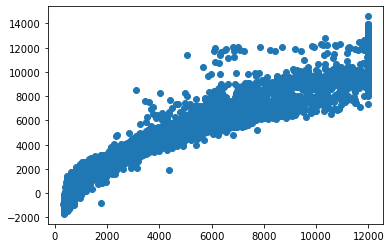

In [86]:
plt.scatter(y_test['price'], y_pred_t2)

In [87]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-4807.7) * Intercept + (8882.95) * carat + (110.3) * cut + (278.25) * color + (440.21) * clarity + (29.26) * depth + (-12.87) * table + (-1244.45) * x + (1415.01) * y + (-892.24) * z + 

## Scaling the data before Linear Regression

In [88]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [89]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()
linearReg.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [90]:
linearReg.score(X_train_scaled, y_train_scaled)

0.9312966038099512

In [91]:
linearReg.score(X_test_scaled, y_test_scaled)

0.9313401152527763

In [92]:
coef = linearReg.coef_[0].T
coef

array([ 1.17935352,  0.03520992,  0.13678998,  0.20936466,  0.01021814,
       -0.00799905, -0.40282068,  0.45484723, -0.1784779 ])

In [93]:
print (pd.DataFrame(coef, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

              Imp
carat    1.179354
y        0.454847
clarity  0.209365
color    0.136790
cut      0.035210
depth    0.010218
table   -0.007999
z       -0.178478
x       -0.402821


Text(0.5, 1.0, 'Importance of Features in Linear Regression')

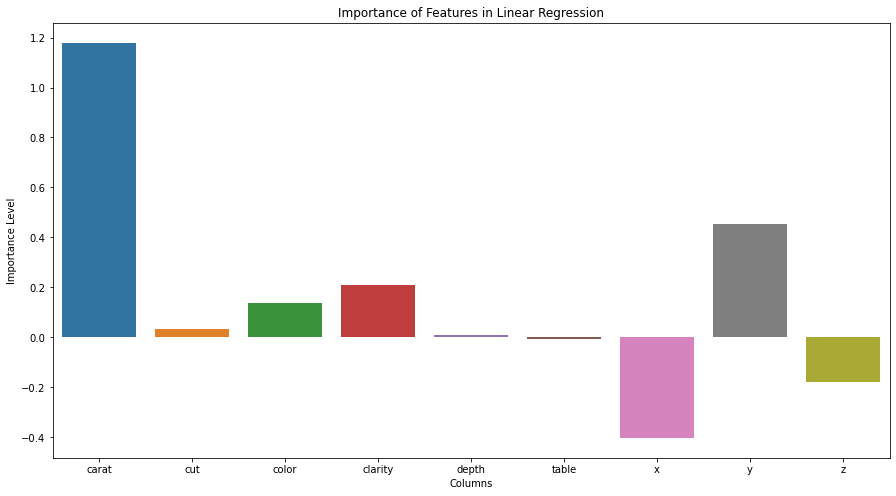

In [94]:
col = X_train.columns
plt.figure(figsize=(15,8))
sns.barplot(x=col, y=coef)
plt.xlabel('Columns')
plt.ylabel('Importance Level')
plt.title('Importance of Features in Linear Regression')

In [95]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linearReg.coef_[0][idx]))

The coefficient for carat is 1.1793535168610327
The coefficient for cut is 0.03520991680418864
The coefficient for color is 0.13678998206679283
The coefficient for clarity is 0.20936465660848488
The coefficient for depth is 0.01021814125718052
The coefficient for table is -0.00799905007438476
The coefficient for x is -0.4028206808641208
The coefficient for y is 0.4548472301310029
The coefficient for z is -0.17847790148706308


In [96]:
linearReg.intercept_

array([-6.42822303e-17])

In [97]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train_scaled, y_train_scaled], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,-0.983742,-0.826474,-0.819083,-0.034626,0.537882,1.194109,-1.176262,-1.159264,-1.121661,-0.923160
2275,-1.070676,0.981336,0.941779,-0.034626,-0.453630,-1.127570,-1.229747,-1.275960,-1.280335,-0.834576
19183,-0.636006,0.981336,-0.232129,-0.641330,0.620508,-0.198899,-0.570093,-0.611693,-0.530240,-0.720311
5030,0.668006,-1.730378,0.941779,-1.248033,1.281516,-0.663234,0.713557,0.761724,0.883399,0.094835
25414,0.494138,0.077431,0.354825,-1.248033,-0.536256,2.122780,0.722471,0.680935,0.638176,0.092527


In [98]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept   -1.016982e-16
carat        1.179354e+00
cut          3.520992e-02
color        1.367900e-01
clarity      2.093647e-01
depth        1.021814e-02
table       -7.999050e-03
x           -4.028207e-01
y            4.548472e-01
z           -1.784779e-01
dtype: float64

In [99]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.838e+04
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:57:26   Log-Likelihood:                -1507.5
No. Observations:               18853   AIC:                             3035.
Df Residuals:                   18843   BIC:                             3113.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.017e-16      0.002  -5.33e-14      1.0

In [100]:
mse_test = np.mean((linearReg.predict(X_test_scaled)-y_test_scaled)**2)
mse_train = np.mean((linearReg.predict(X_train_scaled)-y_train_scaled)**2)

In [101]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

print('Root Mean Square Error of Train set:',math.sqrt(mse_train))
print('Root Mean Square Error of Test set:',math.sqrt(mse_test))

Root Mean Square Error of Train set: 0.26211332699816836
Root Mean Square Error of Test set: 0.26203031264955523


In [102]:
y_test_pred = linearReg.predict(X_test_scaled)
y_train_pred = linearReg.predict(X_train_scaled)

In [103]:
from sklearn import metrics
mse_train1 = metrics.mean_squared_error(y_train_scaled,y_train_pred)
mse_test1  = metrics.mean_squared_error(y_test_scaled,y_test_pred)
rmse_train = np.sqrt(mse_train1)
rmse_test = np.sqrt(mse_test1)

In [104]:
print('Mean Square Error of Train data set:',mse_train1)
print('Mean Square Error of Test data set:',mse_test1)
print('Root Mean Square Error of Train data set:',rmse_train)
print('Root Mean Square Error of Test data set:',rmse_test)

Mean Square Error of Train data set: 0.06870339619004881
Mean Square Error of Test data set: 0.06865988474722368
Root Mean Square Error of Train data set: 0.2621133269981685
Root Mean Square Error of Test data set: 0.26203031264955523


In [105]:
from sklearn.metrics import r2_score

In [106]:
r2_train = r2_score(y_train_scaled,y_train_pred)
r2_test = r2_score(y_test_scaled,y_test_pred)
print('R Squared of Train data set:',r2_train)
print('R Squared of Test data set:',r2_test)

R Squared of Train data set: 0.9312966038099512
R Squared of Test data set: 0.9313401152527763


In [107]:
rm_rsq1 = lm1.rsquared
print('The R-Squared of the model :',rm_rsq1)

The R-Squared of the model : 0.9312966038099512


In [108]:
rm_rsq_a1 = lm1.rsquared_adj
print('The Adjusted R-Squared of the model :',rm_rsq_a1)

The Adjusted R-Squared of the model : 0.9312637889415273


Text(0.5, 1.0, 'Distribution of Data')

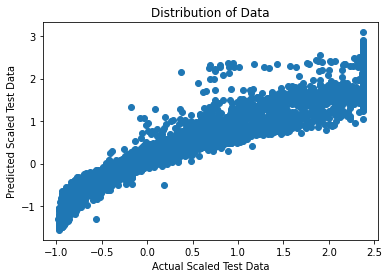

In [109]:
plt.scatter(y_test_scaled, y_test_pred)
plt.xlabel('Actual Scaled Test Data')
plt.ylabel('Predicted Scaled Test Data')
plt.title('Distribution of Data')

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [111]:
vif = [variance_inflation_factor(X_train_scaled.values, ix) for ix in range(X_train.shape[1])] 

In [112]:
i=0
for column in X_train.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 32.85292371563454
cut ---> 1.5085487210109452
color ---> 1.118462574656436
clarity ---> 1.2329007563143581
depth ---> 4.049601607475898
table ---> 1.6144299538635292
x ---> 437.77641345923644
y ---> 419.2708055124267
z ---> 204.95609965558046


In [113]:
vif = [variance_inflation_factor(X_test_scaled.values, ix) for ix in range(X_test.shape[1])] 

In [114]:
i=0
for column in X_test.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 32.73431042162108
cut ---> 1.51397276833375
color ---> 1.1244314196314955
clarity ---> 1.2645882948891463
depth ---> 4.1803071087980905
table ---> 1.6302940892747588
x ---> 361.12992505065074
y ---> 345.9113861602963
z ---> 205.30986601493032


In [115]:
df = pd.DataFrame(data = [[r2_traind,r2_testd,r2_train,r2_test],
                             [mse_t1,mse_t2,mse_train1,mse_test1], 
                             [rmse_t1,rmse_t2,rmse_train,rmse_test]],
                   columns=['LinearReg Train before Scaling', 'LinearReg Test before Scaling', 'LinearReg Train after Scaling', 'LinearReg Test after Scaling'],
                   index=['RSquared','MSE','RMSE'])
round(df,2)

,LinearReg Train before Scaling,LinearReg Test before Scaling,LinearReg Train after Scaling,LinearReg Test after Scaling
RSquared,0.93,0.93,0.93,0.93
MSE,825170.55,828447.68,0.07,0.07
RMSE,908.39,910.19,0.26,0.26


Text(0.5, 1.0, 'Distribution of Data')

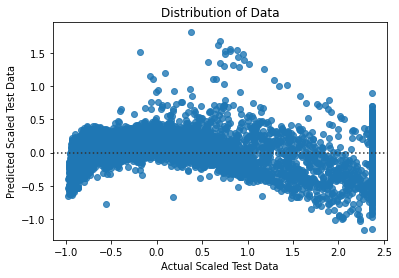

In [116]:
sns.residplot(y_test_scaled, y_test_pred)
plt.xlabel('Actual Scaled Test Data')
plt.ylabel('Predicted Scaled Test Data')
plt.title('Distribution of Data')

In [177]:
print('price =')
for i,j in np.array(lm1.params.reset_index()):
    print(' ({}) * {} +'.format(round(j,2),i),end=' ')

price =
 (-0.0) * Intercept +  (1.18) * carat +  (0.04) * cut +  (0.14) * color +  (0.21) * clarity +  (0.01) * depth +  (-0.01) * table +  (-0.4) * x +  (0.45) * y +  (-0.18) * z + 

### Dropping column x from the model

In [118]:
X1 = cubic.drop(['price','x'],axis=1)
y1 = cubic[['price']]
X_train1, X_test1, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state=1)

In [119]:
X_train_scaled1  = X_train1.apply(zscore)
X_test_scaled1 = X_test1.apply(zscore)
y_train_scaled1 = y_train.apply(zscore)
y_test_scaled1 = y_test.apply(zscore)

In [120]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linearReg1 = LinearRegression()
linearReg1.fit(X_train_scaled1,y_train_scaled1)

LinearRegression()

In [121]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train_scaled1.columns):
    print("The coefficient for {} is {}".format(col_name, linearReg1.coef_[0][idx]))

The coefficient for carat is 1.160538144966971
The coefficient for cut is 0.032854915611204155
The coefficient for color is 0.13682085243026007
The coefficient for clarity is 0.21188104521517312
The coefficient for depth is 0.019486646966071598
The coefficient for table is -0.011556587084954488
The coefficient for y is 0.1638037001272925
The coefficient for z is -0.2706244289931101


In [122]:
linearReg1.intercept_

array([-8.11301107e-18])

In [123]:
data_train1 = pd.concat([X_train_scaled1, y_train_scaled1], axis=1)
data_train1.head()

,carat,cut,color,clarity,depth,table,y,z,price
22114,-0.983742,-0.826474,-0.819083,-0.034626,0.537882,1.194109,-1.159264,-1.121661,-0.923160
2275,-1.070676,0.981336,0.941779,-0.034626,-0.453630,-1.127570,-1.275960,-1.280335,-0.834576
19183,-0.636006,0.981336,-0.232129,-0.641330,0.620508,-0.198899,-0.611693,-0.530240,-0.720311
5030,0.668006,-1.730378,0.941779,-1.248033,1.281516,-0.663234,0.761724,0.883399,0.094835
25414,0.494138,0.077431,0.354825,-1.248033,-0.536256,2.122780,0.680935,0.638176,0.092527


In [124]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+y+z', data = data_train1).fit()
lm2.params

Intercept   -3.794708e-17
carat        1.160538e+00
cut          3.285492e-02
color        1.368209e-01
clarity      2.118810e-01
depth        1.948665e-02
table       -1.155659e-02
y            1.638037e-01
z           -2.706244e-01
dtype: float64

In [125]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 3.175e+04
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:59:04   Log-Likelihood:                -1558.2
No. Observations:               18853   AIC:                             3134.
Df Residuals:                   18844   BIC:                             3205.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.795e-17      0.002  -1.98e-14      1.0

In [126]:
y_test_pred1 = linearReg1.predict(X_test_scaled1)
y_train_pred1 = linearReg1.predict(X_train_scaled1)

In [127]:
from sklearn import metrics
mse_train11 = metrics.mean_squared_error(y_train_scaled1,y_train_pred1)
mse_test11  = metrics.mean_squared_error(y_test_scaled1,y_test_pred1)
rmse_train1 = np.sqrt(mse_train11)
rmse_test1 = np.sqrt(mse_test11)

In [128]:
lm2_rsq = lm2.rsquared
print('The R-Squared of the model :',lm2_rsq)

The R-Squared of the model : 0.9309259477034477


In [129]:
lm2_rsq_a = lm2.rsquared_adj
print('The Adjusted R-Squared of the model :',lm2_rsq_a)

The Adjusted R-Squared of the model : 0.9308966231217043


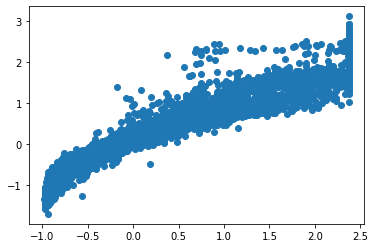

In [130]:
plt.scatter(y_test_scaled1, y_test_pred1)

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [132]:
vif = [variance_inflation_factor(X_train_scaled1.values, ix) for ix in range(X_train1.shape[1])] 

In [133]:
i=0
for column in X_train1.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 31.897811380236842
cut ---> 1.4935859819068287
color ---> 1.1184600035957577
clarity ---> 1.215816964873269
depth ---> 3.8178363766636294
table ---> 1.5802849084710133
y ---> 190.74000601719536
z ---> 182.0481200420192


In [134]:
vif = [variance_inflation_factor(X_test_scaled1.values, ix) for ix in range(X_test1.shape[1])] 

In [135]:
i=0
for column in X_test1.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 31.217474547261826
cut ---> 1.5061402501126566
color ---> 1.1242354405100066
clarity ---> 1.2513362090898155
depth ---> 3.8945439293363835
table ---> 1.604578365216172
y ---> 183.19086245774272
z ---> 180.60553551441245


### Dropping column x and y from the model

In [136]:
X1 = cubic.drop(['price','x','y'],axis=1)
y1 = cubic[['price']]
X_train1, X_test1, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state=1)

In [137]:
X_train_scaled1  = X_train1.apply(zscore)
X_test_scaled1 = X_test1.apply(zscore)
y_train_scaled1 = y_train.apply(zscore)
y_test_scaled1 = y_test.apply(zscore)

In [138]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linearReg1 = LinearRegression()
linearReg1.fit(X_train_scaled1,y_train_scaled1)

LinearRegression()

In [139]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train_scaled1.columns):
    print("The coefficient for {} is {}".format(col_name, linearReg1.coef_[0][idx]))

The coefficient for carat is 1.1786148303290676
The coefficient for cut is 0.03230611695953345
The coefficient for color is 0.13688000589618232
The coefficient for clarity is 0.2117732754921962
The coefficient for depth is 0.001142536348783656
The coefficient for table is -0.01220033746448703
The coefficient for z is -0.1243409518549829


In [140]:
linearReg1.intercept_

array([-2.08461805e-16])

In [141]:
data_train1 = pd.concat([X_train_scaled1, y_train_scaled1], axis=1)
data_train1.head()

,carat,cut,color,clarity,depth,table,z,price
22114,-0.983742,-0.826474,-0.819083,-0.034626,0.537882,1.194109,-1.121661,-0.923160
2275,-1.070676,0.981336,0.941779,-0.034626,-0.453630,-1.127570,-1.280335,-0.834576
19183,-0.636006,0.981336,-0.232129,-0.641330,0.620508,-0.198899,-0.530240,-0.720311
5030,0.668006,-1.730378,0.941779,-1.248033,1.281516,-0.663234,0.883399,0.094835
25414,0.494138,0.077431,0.354825,-1.248033,-0.536256,2.122780,0.638176,0.092527


In [143]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+z', data = data_train1).fit()
lm2.params

Intercept   -2.504507e-16
carat        1.178615e+00
cut          3.230612e-02
color        1.368800e-01
clarity      2.117733e-01
depth        1.142536e-03
table       -1.220034e-02
z           -1.243410e-01
dtype: float64

In [144]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 3.620e+04
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:00:39   Log-Likelihood:                -1577.4
No. Observations:               18853   AIC:                             3171.
Df Residuals:                   18845   BIC:                             3234.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.505e-16      0.002  -1.31e-13      1.0

In [145]:
y_test_pred1 = linearReg1.predict(X_test_scaled1)
y_train_pred1 = linearReg1.predict(X_train_scaled1)

In [146]:
from sklearn import metrics
mse_train11 = metrics.mean_squared_error(y_train_scaled1,y_train_pred1)
mse_test11  = metrics.mean_squared_error(y_test_scaled1,y_test_pred1)
rmse_train1 = np.sqrt(mse_train11)
rmse_test1 = np.sqrt(mse_test11)

In [147]:
lm2_rsq1 = lm2.rsquared
print('The R-Squared of the model :',lm2_rsq1)

The R-Squared of the model : 0.9307852763637763


In [148]:
lm2_rsq_a1 = lm2.rsquared_adj
print('The Adjusted R-Squared of the model :',lm2_rsq_a1)

The Adjusted R-Squared of the model : 0.9307595664637788


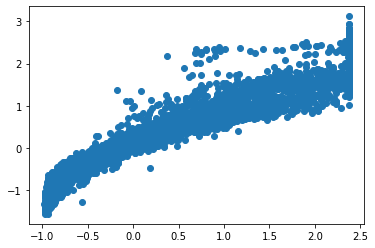

In [149]:
plt.scatter(y_test_scaled1, y_test_pred1)

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [151]:
vif = [variance_inflation_factor(X_train_scaled1.values, ix) for ix in range(X_train1.shape[1])] 

In [152]:
i=0
for column in X_train1.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 29.574903569425228
cut ---> 1.4914449632687803
color ---> 1.118435129072356
clarity ---> 1.2157344014085458
depth ---> 1.4256902925710166
table ---> 1.5773389313294286
z ---> 29.928607043927272


In [153]:
vif = [variance_inflation_factor(X_test_scaled1.values, ix) for ix in range(X_test1.shape[1])] 

In [154]:
i=0
for column in X_test1.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 29.540404574658258
cut ---> 1.5043324754970284
color ---> 1.1234762111275292
clarity ---> 1.2510750833008915
depth ---> 1.443259519626005
table ---> 1.6011207872861142
z ---> 30.026315894745313


### Dropping column x, y and z from the model

In [155]:
X1 = cubic.drop(['price','x','y','z'],axis=1)
y1 = cubic[['price']]
X_train1, X_test1, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state=1)

In [156]:
X_train_scaled1  = X_train1.apply(zscore)
X_test_scaled1 = X_test1.apply(zscore)
y_train_scaled1 = y_train.apply(zscore)
y_test_scaled1 = y_test.apply(zscore)

In [157]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linearReg1 = LinearRegression()
linearReg1.fit(X_train_scaled1,y_train_scaled1)

LinearRegression()

In [158]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train_scaled1.columns):
    print("The coefficient for {} is {}".format(col_name, linearReg1.coef_[0][idx]))

The coefficient for carat is 1.0577477925722865
The coefficient for cut is 0.03300917128647696
The coefficient for color is 0.13590896274141934
The coefficient for clarity is 0.21531176617463968
The coefficient for depth is -0.0062895596460102576
The coefficient for table is -0.010875691767438467


In [159]:
linearReg1.intercept_

array([-2.09174915e-16])

In [160]:
data_train1 = pd.concat([X_train_scaled1, y_train_scaled1], axis=1)
data_train1.head()

,carat,cut,color,clarity,depth,table,price
22114,-0.983742,-0.826474,-0.819083,-0.034626,0.537882,1.194109,-0.923160
2275,-1.070676,0.981336,0.941779,-0.034626,-0.453630,-1.127570,-0.834576
19183,-0.636006,0.981336,-0.232129,-0.641330,0.620508,-0.198899,-0.720311
5030,0.668006,-1.730378,0.941779,-1.248033,1.281516,-0.663234,0.094835
25414,0.494138,0.077431,0.354825,-1.248033,-0.536256,2.122780,0.092527


In [161]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table', data = data_train1).fit()
lm2.params

Intercept   -2.365729e-16
carat        1.057748e+00
cut          3.300917e-02
color        1.359090e-01
clarity      2.153118e-01
depth       -6.289560e-03
table       -1.087569e-02
dtype: float64

In [162]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 4.190e+04
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:01:34   Log-Likelihood:                -1647.5
No. Observations:               18853   AIC:                             3309.
Df Residuals:                   18846   BIC:                             3364.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.366e-16      0.002  -1.23e-13      1.0

In [163]:
y_test_pred1 = linearReg1.predict(X_test_scaled1)
y_train_pred1 = linearReg1.predict(X_train_scaled1)

In [164]:
from sklearn import metrics
mse_train11 = metrics.mean_squared_error(y_train_scaled1,y_train_pred1)
mse_test11  = metrics.mean_squared_error(y_test_scaled1,y_test_pred1)
rmse_train1 = np.sqrt(mse_train11)
rmse_test1 = np.sqrt(mse_test11)

In [165]:
lm2_rsq2 = lm2.rsquared
print('The R-Squared of the model :',lm2_rsq2)

The R-Squared of the model : 0.9302686912689366


In [166]:
lm2_rsq_a2 = lm2.rsquared_adj
print('The Adjusted R-Squared of the model :',lm2_rsq_a2)

The Adjusted R-Squared of the model : 0.93024649091595


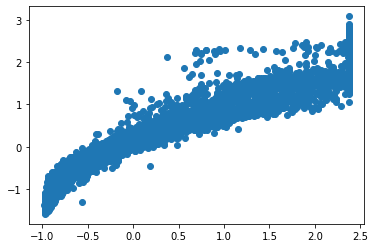

In [167]:
plt.scatter(y_test_scaled1, y_test_pred1)

In [168]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [169]:
vif = [variance_inflation_factor(X_train_scaled1.values, ix) for ix in range(X_train1.shape[1])] 

In [170]:
i=0
for column in X_train1.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 1.295262979648412
cut ---> 1.4904881308096702
color ---> 1.116609825133409
clarity ---> 1.1914965431450795
depth ---> 1.3187649255257503
table ---> 1.5739422281720268


In [171]:
vif = [variance_inflation_factor(X_test_scaled1.values, ix) for ix in range(X_test1.shape[1])] 

In [172]:
i=0
for column in X_test1.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 1.3208302850568776
cut ---> 1.5029340712505104
color ---> 1.1222651742350231
clarity ---> 1.215019536389503
depth ---> 1.3329026015599033
table ---> 1.5964719925318709


In [173]:
df = pd.DataFrame(data = [[r2_traind,r2_testd,r2_train,r2_test],
                             [mse_t1,mse_t2,mse_train1,mse_test1], 
                             [rmse_t1,rmse_t2,rmse_train,rmse_test]],
                   columns=['LinearReg Train before Scaling', 'LinearReg Test before Scaling', 'LinearReg Train after Scaling', 'LinearReg Test after Scaling'],
                   index=['RSquared','MSE','RMSE'])
round(df,2)

,LinearReg Train before Scaling,LinearReg Test before Scaling,LinearReg Train after Scaling,LinearReg Test after Scaling
RSquared,0.93,0.93,0.93,0.93
MSE,825170.55,828447.68,0.07,0.07
RMSE,908.39,910.19,0.26,0.26


In [174]:
df1 = pd.DataFrame(data = [[rm_rsq,rm_rsq1],
                             [rm_rsq_a,rm_rsq_a1]],
                   columns=['LinearReg before Scaling', 'LinearReg after Scaling'],
                   index=['RSquared','Adj RSquared'])
round(df1,2)

,LinearReg before Scaling,LinearReg after Scaling
RSquared,0.93,0.93
Adj RSquared,0.93,0.93


In [175]:
df1 = pd.DataFrame(data = [[rm_rsq,rm_rsq1,lm2_rsq,lm2_rsq1,lm2_rsq2],
                             [rm_rsq_a,rm_rsq_a1,lm2_rsq_a,lm2_rsq_a1,lm2_rsq_a2]],
                   columns=['LR before Scaling', 'LR after Scaling','After Dropping X','After Dropping X,Y','After Dropping X,Y,Depth'],
                   index=['RSquared','Adj RSquared'])
round(df1,2)

,LR before Scaling,LR after Scaling,After Dropping X,"After Dropping X,Y","After Dropping X,Y,Depth"
RSquared,0.93,0.93,0.93,0.93,0.93
Adj RSquared,0.93,0.93,0.93,0.93,0.93
